In [9]:
import os
import shutil

# Create the directory if it doesn't exist
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Copy the file
shutil.copy("kaggle.json", kaggle_dir)



'C:\\Users\\jyoti/.kaggle\\kaggle.json'

In [11]:
!pip install kaggle

!kaggle datasets download -d salader/dogs-vs-cats


     ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
     ---------------------------------------- 83.6/83.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
     ---------------------------------------- 78.2/78.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110693 sha256=5690f07b17f5f6df187fbfd60dcd8a458d361c756edea221e7571e245dfad0c0
  Stored in directory: c:\users\jyoti\appdata\local\pip\cache\wheels\43\4b\fb\736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle




  0%|          | 0.00/1.06G [00:00<?, ?B/s]
  0%|          | 1.00M/1.06G [00:01<27:13, 699kB/s]
  0%|          | 2.00M/1.06G [00:01<13:38, 1.39MB/s]
  0%|          | 3.00M/1.06G [00:01<08:27, 2.25MB/s]
  0%|          | 4.00M/1.06G [00:01<06:00, 3.16MB/s]
  1%|          | 7.00M/1.06G [00:02<02:47, 6.76MB/s]
  1%|          | 9.00M/1.06G [00:02<02:11, 8.65MB/s]
  1%|          | 11.0M/1.06G [00:02<02:12, 8.53MB/s]
  1%|          | 13.0M/1.06G [00:02<02:44, 6.88MB/s]
  1%|▏         | 15.0M/1.06G [00:03<02:15, 8.30MB/s]
  2%|▏         | 18.0M/1.06G [00:03<01:36, 11.6MB/s]
  2%|▏         | 20.0M/1.06G [00:03<01:25, 13.1MB/s]
  2%|▏         | 23.0M/1.06G [00:03<01:09, 16.2MB/s]
  2%|▏         | 25.0M/1.06G [00:03<01:15, 14.8MB/s]
  2%|▏         | 27.0M/1.06G [00:03<01:14, 14.9MB/s]
  3%|▎         | 30.0M/1.06G [00:03<01:06, 16.8MB/s]
  3%|▎         | 32.0M/1.06G [00:04<01:06, 16.8MB/s]
  3%|▎         | 34.0M/1.06G [00:04<01:03, 17.3MB/s]
  3%|▎         | 36.0M/1.06G [00:04<01:05, 17.0MB/s]
  

In [18]:
#unzipping the abstracted file
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
#importing the important libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
import cv2
#importing our pretrained vgg16 model
from keras.applications.vgg16 import VGG16

In [2]:
#assigning the same weights
conv_base = VGG16(
 weights='imagenet',
 include_top=False,
 input_shape=(150, 150, 3)
)




58889256/58889256 [==============================] - 9s 0us/step


In [3]:
#getting the summary of our model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
#MAKING OUR OWN FULLY CONNECTED LAYER
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#getting the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
#we will not train convolutional layer
conv_base.trainable = False
#getting the summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [6]:
# DATA AUGMENTATION (TO AVOID OVERFITTING)
# importing library
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# compiling our model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Fix syntax error here

# training begins
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.



C:\Users\jyoti\AppData\Local\Temp\ipykernel_13328\3001034026.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


625/625 [==============================] - 2088s 3s/step - loss: 0.3121 - accuracy: 0.8690 - val_loss: 0.2324 - val_accuracy: 0.9008
Epoch 2/10
625/625 [==============================] - 2280s 4s/step - loss: 0.2410 - accuracy: 0.8969 - val_loss: 0.2039 - val_accuracy: 0.9148
Epoch 3/10
625/625 [==============================] - 2054s 3s/step - loss: 0.2228 - accuracy: 0.9029 - val_loss: 0.2064 - val_accuracy: 0.9154
Epoch 4/10
625/625 [==============================] - 2014s 3s/step - loss: 0.2108 - accuracy: 0.9116 - val_loss: 0.2099 - val_accuracy: 0.9114
Epoch 5/10
625/625 [==============================] - 2133s 3s/step - loss: 0.2042 - accuracy: 0.9134 - val_loss: 0.1947 - val_accuracy: 0.9174
Epoch 6/10
625/625 [==============================] - 1899s 3s/step - loss: 0.1962 - accuracy: 0.9157 - val_loss: 0.1933 - val_accuracy: 0.9178
Epoch 7/10
625/625 [==============================] - 1869s 3s/step - loss: 0.1930 - accuracy: 0.9187 - val_loss: 0.1965 - val_accurac

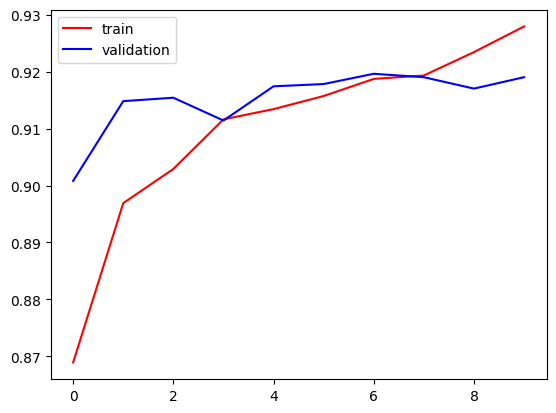

In [8]:
#checking the accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

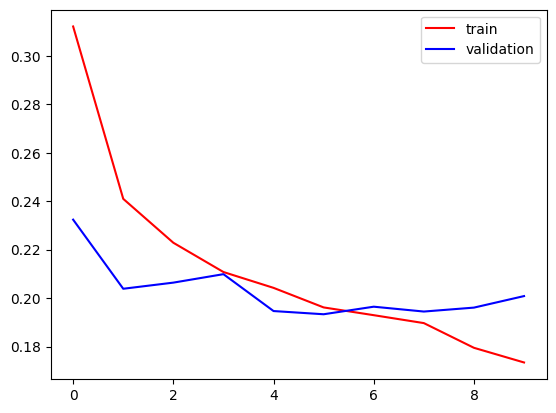

In [9]:
#checking the loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

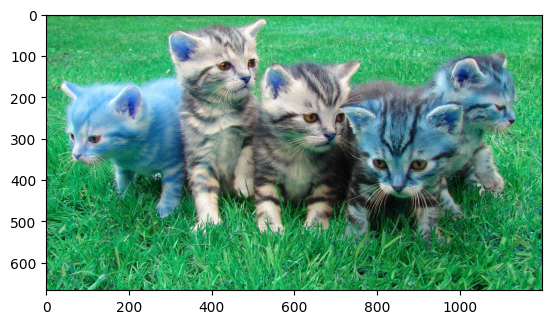

In [11]:
#TESTING ON NEWER IMAGES
#LOADING OUR IMAGE
test_img = cv2.imread('test\cats\cat_60.jpg')
plt.imshow(test_img)

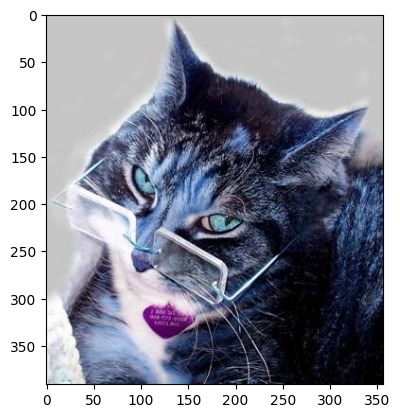

In [12]:
test_img = cv2.imread('/content/test/cats/cat.10035.jpg')
plt.imshow(test_img)
plt.show()


In [13]:
#getting the shape of image
test_img.shape


(391, 356, 3)

In [14]:
#resizing the image
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))
#predicting the result
model.predict(test_input)


1/1 [==============================] - 0s 101ms/step


array([[0.]], dtype=float32)

***OBSERVATION: WE CAN SEE THAT OUR MODEL HAS PERFORMED REALLY WELL WITH A
TRAINING ACCURACY OF 93% AND VALIDATION ACCURACY OF 90%***

In [15]:
# Save the trained model
model.save('resnet_model.h5') 

c:\Users\jyoti\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
